In [ ]:
# Imports Library
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Unggah file 'archive.zip' dari komputer Anda.
uploaded = files.upload()

# Ekstrak file zip ke dalam direktori 'utkface'
zip_path = "utkface-new.zip"
extract_dir = "utkface"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File berhasil diekstrak ke dalam folder '{extract_dir}'.")

Saving utkface-new.zip to utkface-new.zip
File berhasil diekstrak ke dalam folder 'utkface'.


In [ ]:
# Tentukan path ke folder gambar yang sudah diekstrak
folder_path = os.path.join(extract_dir, "UTKFace")
images = []
labels = []

# Batasi jumlah gambar yang akan dimuat
jumlah_maksimal = 10000

print(f"Memuat maksimal {jumlah_maksimal} gambar dari dataset...")

# Loop melalui setiap file di dalam folder
for img_name in os.listdir(folder_path):
    if img_name.endswith(".jpg.chip.jpg"):
        try:
            # Ekstrak label gender dari nama file (0=Pria, 1=Wanita)
            gender = int(img_name.split("_")[1])
            img_path = os.path.join(folder_path, img_name)

            # Baca dan resize gambar
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))

            images.append(img)
            labels.append(gender)

            # Hentikan loop jika jumlah maksimal telah tercapai
            if len(images) >= jumlah_maksimal:
                break

        except Exception as e:
            print(f"Gagal memproses {img_name}: {e}")

# Konversi list menjadi array numpy dan normalisasi gambar
X = np.array(images)
X = X / 255.0

# Konversi label menjadi format one-hot encoding
y = to_categorical(labels, num_classes=2)

print(f"\nTotal gambar berhasil dimuat: {len(X)}")

Memuat maksimal 10000 gambar dari dataset...

Total gambar berhasil dimuat: 10000


In [ ]:
# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Membuat arsitektur model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melakukan training awal selama 10 epoch
print("\nMemulai training model awal...")
history_awal = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Memulai training model awal...
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 423ms/step - accuracy: 0.6232 - loss: 0.6253 - val_accuracy: 0.8037 - val_loss: 0.4285
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.8073 - loss: 0.4236 - val_accuracy: 0.7894 - val_loss: 0.4544
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 449ms/step - accuracy: 0.8432 - loss: 0.3562 - val_accuracy: 0.8575 - val_loss: 0.3219
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 436ms/step - accuracy: 0.8620 - loss: 0.3158 - val_accuracy: 0.8619 - val_loss: 0.3253
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 409ms/step - accuracy: 0.8582 - loss: 0.2967 - val_accuracy: 0.8650 - val_loss: 0.3161
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.8793 - loss: 0.2749 - val_accuracy: 0.8625 - val_loss: 0.3133
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.8908 - loss: 0.2590 - val_accuracy: 0.8675 - val_loss: 0.2917
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 406ms/s

In [ ]:
# Membuat generator untuk augmentasi data training
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
# Melanjutkan training dengan data yang sudah diaugmentasi
print("\nMemulai training model dengan augmentasi data...")
history_aug = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=30, validation_data=(X_test, y_test))


Memulai training model dengan augmentasi data...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 515ms/step - accuracy: 0.7892 - loss: 0.4529 - val_accuracy: 0.8835 - val_loss: 0.2649
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 494ms/step - accuracy: 0.8243 - loss: 0.3876 - val_accuracy: 0.8730 - val_loss: 0.2760
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 481ms/step - accuracy: 0.8402 - loss: 0.3546 - val_accuracy: 0.8860 - val_loss: 0.2654
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 492ms/step - accuracy: 0.8357 - loss: 0.3641 - val_accuracy: 0.8745 - val_loss: 0.2714
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step - accuracy: 0.8416 - loss: 0.3387 - val_accuracy: 0.8970 - val_loss: 0.2553
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step - accuracy: 0.8582 - loss: 0.3261 - val_accuracy: 0.8900 - val_loss: 0.2622
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 488ms/step - accuracy: 0.8565 - loss: 0.3234 - val_accuracy: 0.8910 - val_loss: 0.2527
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 482ms/step - accuracy: 0.8613 - loss: 0


--- EVALUASI AKHIR MODEL ---
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9127 - loss: 0.2481

Akurasi Akhir pada Data Uji: 90.65%
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


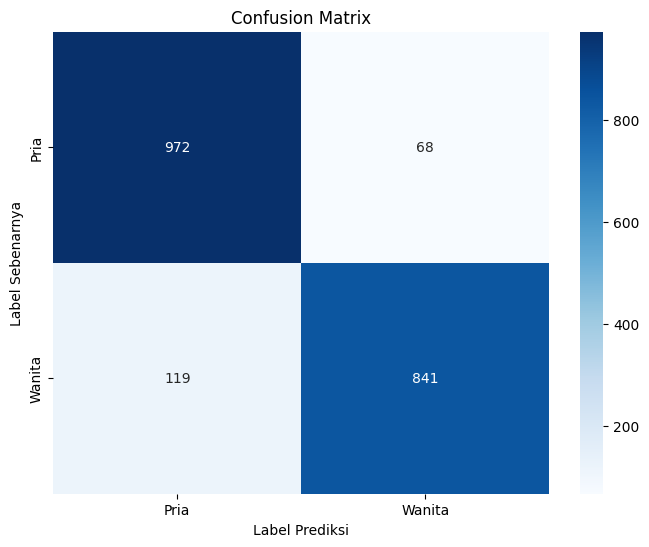


Laporan Klasifikasi:
              precision    recall  f1-score   support

        Pria       0.89      0.93      0.91      1040
      Wanita       0.93      0.88      0.90       960

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
print("\n--- EVALUASI AKHIR MODEL ---")
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAkurasi Akhir pada Data Uji: {acc*100:.2f}%")

# Mendapatkan prediksi dari model untuk data uji
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pria', 'Wanita'],
            yticklabels=['Pria', 'Wanita'])
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
target_names = ['Pria', 'Wanita']
print(classification_report(y_true, y_pred_classes, target_names=target_names))